# Notebook 2:  Clustering con GMM y Algoritmos Jerárquicos

En este notebook vamos a implementar el algoritmo de clustering de Mezcla de Normales en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [336]:
# Librerias a instalar

# install.packages("cluster")
# install.packages("mclust")

In [337]:
library(mclust)
library(cluster)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 9 components: 

 log-likelihood  n  df       BIC       ICL
       69.49069 25 148 -337.4122 -337.4122

Clustering table:
1 2 3 4 5 6 7 8 9 
3 3 6 3 2 1 1 4 2 

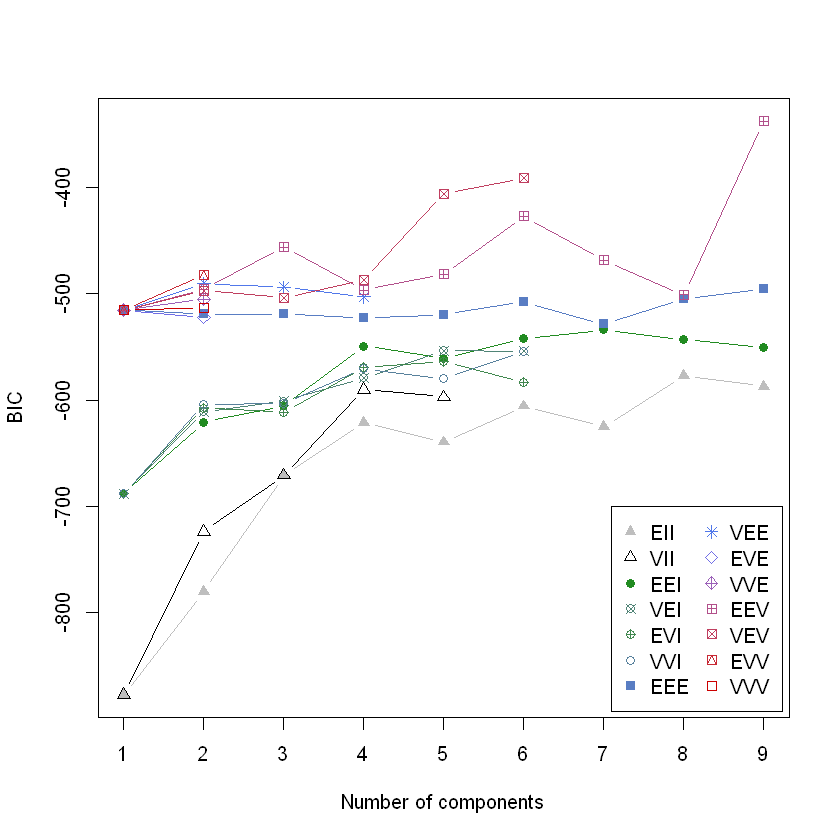

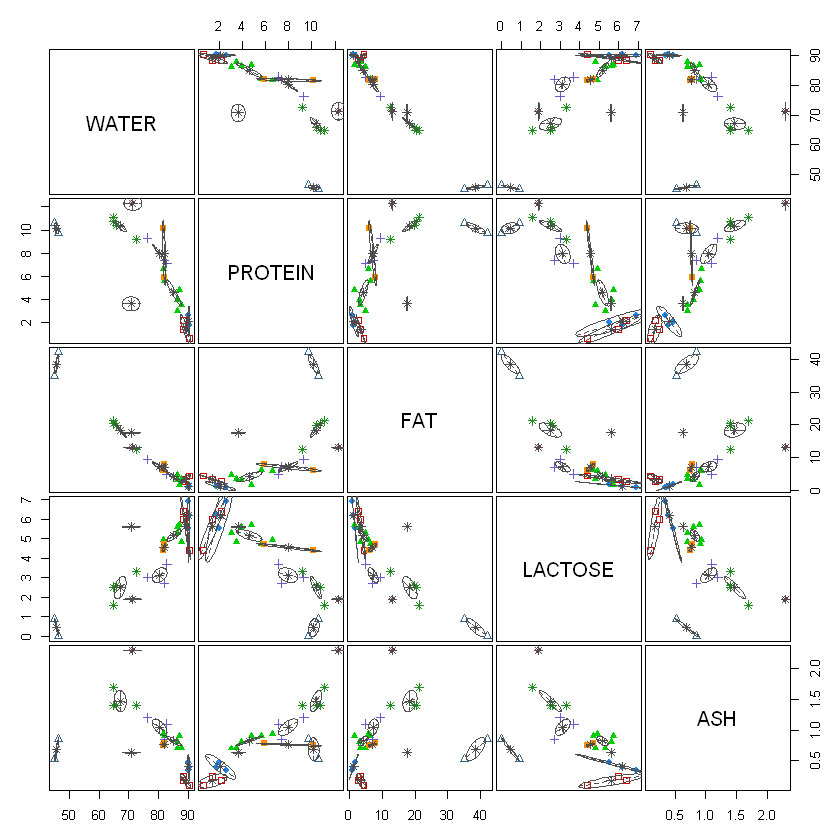

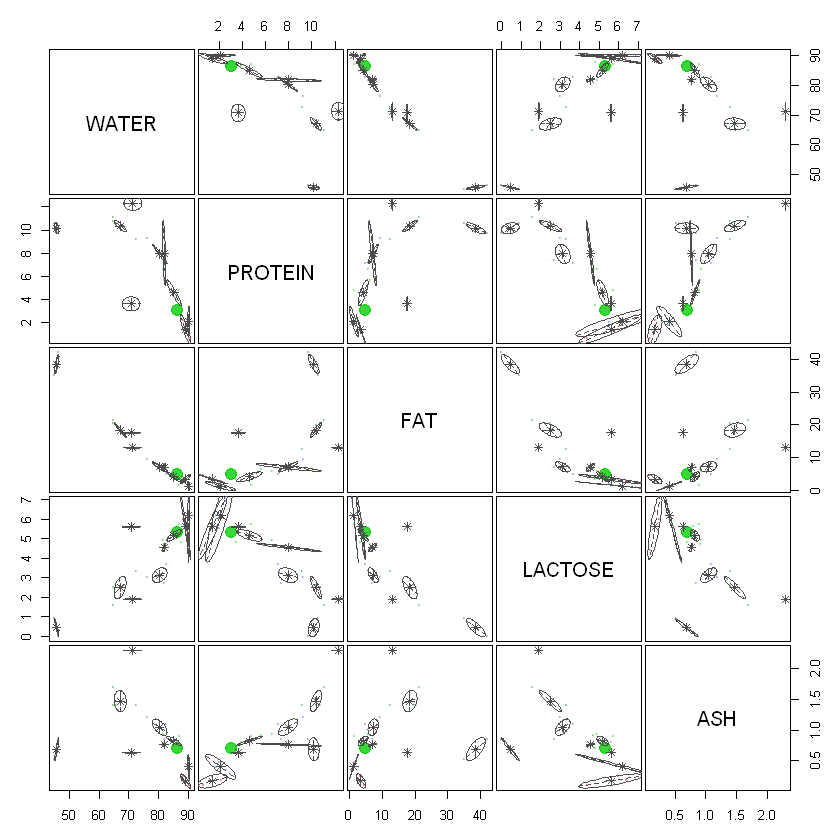

'Mclust' model object: (EEV,9) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

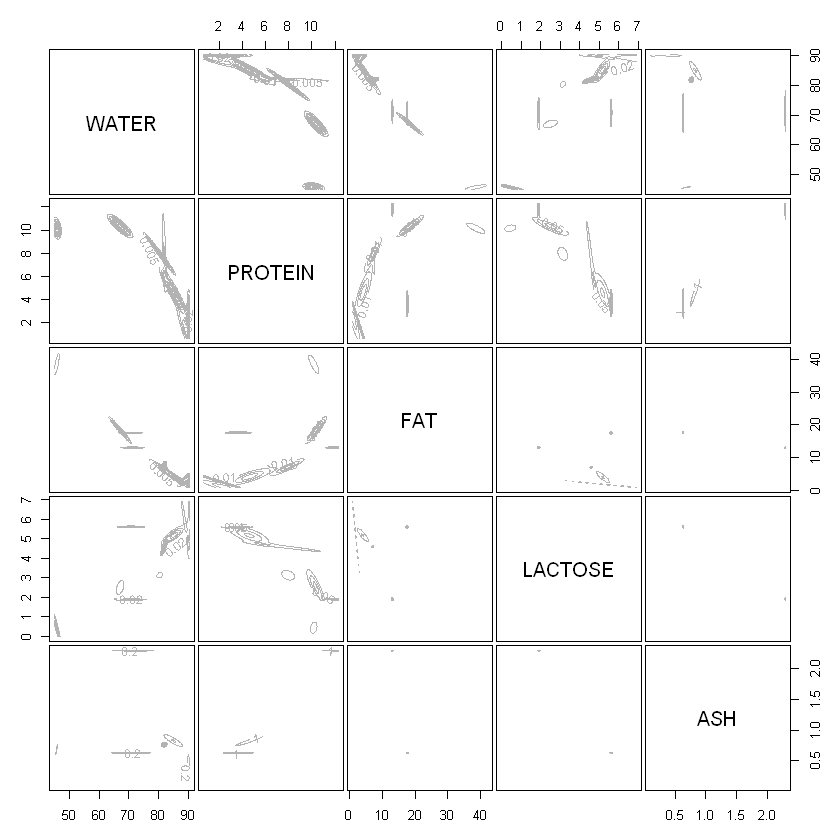

In [338]:
clus <-Mclust(datos)
summary(clus)
plot(clus)
clus


In [339]:
cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl


WATER,PROTEIN,FAT,LACTOSE,ASH
90.13333,2.100000,1.400000,6.200000,0.4066667
89.10000,1.400000,3.566667,5.600000,0.1733333
85.15000,4.566667,4.233333,5.166667,0.8250000
80.33333,7.933333,7.266667,3.133333,1.0500000
81.85000,8.000000,7.100000,4.550000,0.7650000
70.70000,3.600000,17.600000,5.600000,0.6300000
71.30000,12.300000,13.100000,1.900000,2.3000000
67.00000,10.350000,18.450000,2.500000,1.4750000
45.65000,10.150000,38.450000,0.450000,0.6900000


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          2          2          1          2          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         5          4          5          3          3          1          4 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          4          6          7          8          8 
  REINDEER      WHALE       SEAL    DOLPHIN 
         8          8          9          9

**Ejercicio 1:**

a) Explique como funciona el método Mclust, describa los principales parámetros de entrada y salida.

b) Interprete y comente los resultados obtenidos. 

In [340]:
#1.a
#Cómo funciona el método Mclust
#El método Mclust se basa en agrupamiento basado en modelos de mezcla gaussiana finitos parametrizados. 
#Los modelos se estiman mediante un algoritmo EM inicializado mediante un agrupamiento aglomerativo basado en un modelo jerárquico. 
#A continuación, se selecciona el modelo óptimo de acuerdo con BIC.

In [341]:
#1.a
#Parámetros de entrada
#data: Datos de las observaciones de milk1
#G: Vector que especifica el número de componentes de la mezcla (grupos) para los que se calculará el BIC.
    #Por defecto G=1:9
#modelNames: #Un vector de string que indica los modelos que se ajustarán en la fase EM de agrupamiento. 
             #El string describe las distintas configuraciones de la distribución normal multivariada, 
             #por defecto el método evalúa 14 configuraciones distintas que se pueden apreciar en el gráfico 
             #(EII,VII,EEI,VEI,EVI,VVI,EEE,VEE,EVE,VVE,EEV,VEV,EVV,VVV)           
#prior: Este argumento permite la especificación de un valor previo conjugado en las medias 
        #y las varianzas a través de la función priorControl.
        #En el caso multivariable solo se pueden usar 10 de los 14 modelos junto con un modelo anterior
        #Por defecto no se entrega.
#control: Parámetros de control del algoritmo EM
          #Los valores predeterminados se establecen mediante la llamada emControl().
          #Por defecto no se entrega.
#initializatin: parámetros para el clustering inicial
                #Por defecto no se entrega.
#warn: #Un valor lógico que indica si se deben emitir o no ciertas advertencias (warnings, generalmente relacionadas con la singularidad). 
       #El valor predeterminado está controlado por mclust.options.
#x: #Es un objeto de clase 'mclustBIC'. 
    #Si se proporcionan, los valores BIC de los modelos que ya se calcularon y están disponibles en x no se vuelven a calcular. 
    #Todos los argumentos, con la excepción de data, G y modelName, se ignoran 
    #y sus valores se establecen como se especifica en los atributos de x. 
    #Los valores predeterminados para G y modelNames se toman de x.
#verbose: Es un control lógico que muestra una barra de progreso de texto durante el procedimiento de ajuste. 
          #Por defecto es VERDADERO si la sesión es interactiva y FALSO en caso contrario.

In [342]:
#1.a
#Parámetros de salida
#Clustering table

#call: Función que se utiliza para los datos (data)
#data: Datos que se usaron en la función
#modelname: Nombre del modelo que tiene el valor más óptimo del BIC
#n: Número de datos
#d: Dimensión de los datos
#G: Número óptimo de grupos
#BIC: Contiene todos los valores BIC calculados por modelo
#loglik: Corresponde al BIC óptimo
#df: Número de parámetros estimados
#bic: Valor BIC de cada modelo seleccionado
#icl:
#hypvol: retorna el mínimo valor de hipér-volumen, si no tienen retorna null
#parameters: retorna pro (proporción de mezcla), mean (media) y variance (varianza) por cada grupo
#z: es una matriz de tamaño [i,k] que contiene los datos de probabilidad de que la observación i en los datos de prueba 
    #pertenezca a la clase k
#classification: Retorna una lista que muestra a qué grupo corresponde cada dato
#uncertainty: La incertidumbre asociada a cada dato

In [343]:
#1.b
#Se escoge el primer máximo local en el gráfico cuando sube (en este caso entre 3 y 4).
#Con G=3 (por "parsimonia"), se puede observar que la función Mclust caracteriza los grupos según: 
# - un primer grupo con altos porcentajes de agua y lactosa, pero bajos en proteína, grasas y ASH.
# - un segundo grupo con niveles medios en todas las variables a comparación de los otros 2 grupos.
# - finalmente un tercer grupo que tiene valores por encima de los otros 2 en proteína, grasas y ASH, 
    #mientras que presenta los niveles más bajos en porcentaje de agua y lactosa.
 
#Podemos notar que el método de GMM con G=3 caracterizó de igual manera a los grupos que el método k-mean, 
#aunque pudiéndose notar algunas diferencias como cambios en ciertos animales que componían estos grupos

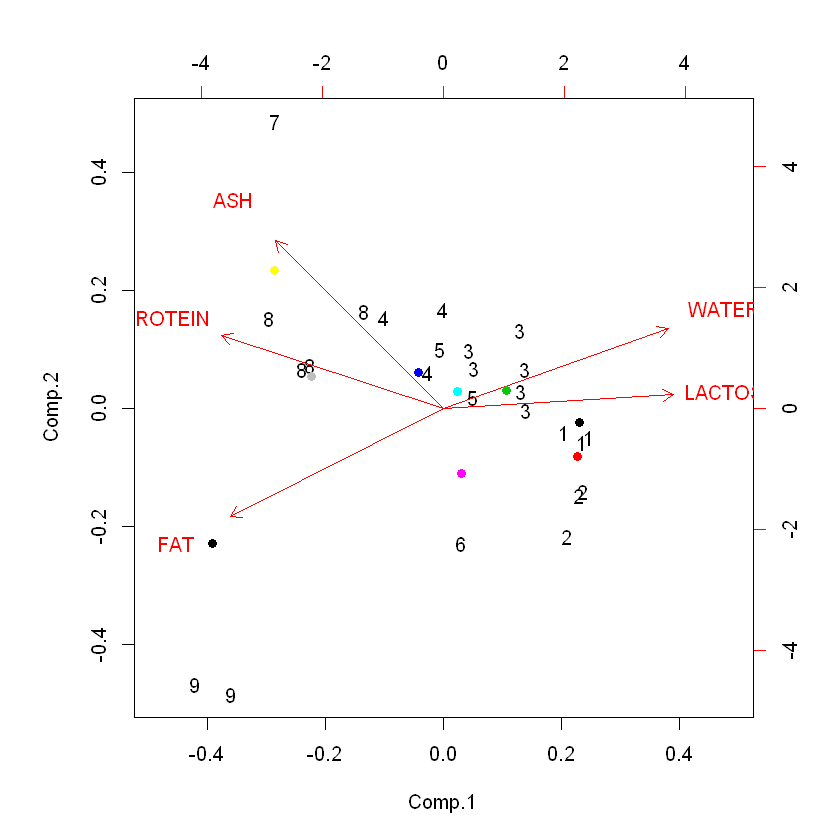

In [344]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)


**Criterio de Información Bayesiano**

Una forma de discriminar entre posibles agrupamientos, es calcular el Criterio de Información Bayesiano, cuya expresión genérica es:
$$BIC = log L(Datos\mid \hat{\theta}) - \frac{d}{2}log(N)$$
donde $d$ es el número de parámetros libres y $N$ el número de observaciones. A medida que aumenta el número de parámetros la verosimilitud aumenta, pero esto es moderado por el término en que depende de $d$.

Mclust calcula automática el BIC para distintas configuraciones de las matrices covarianza de cada Normal multivariada (que corresponden a distintos números de parámetros) así como distinto número de grupos. Por parsimonia, es recomendable escoger el primer número de grupos que representa un máximo local.

**Ejercicio 2:**

a) Utilice Mclust sin definir el número de grupos y considere el Criterio de información Bayesiano (BIC) para decidir el número de grupos óptimo. 

b) Discuta y compare  sus resultados con aquellos obtenidos con k-means

In [345]:
#2.a
#Considerando el gráfico del Criterio de información Bayesiano (BIC) se observa que en G=3 se tiene en primera instancia un máximo local, 
#los máximos locales que se pueden distinguir después están en G=6, G=9. Deicimos definir quedarnos en G=3 por parsimonia y ya que en G=3 
#podemos tener una buena interpretación de los datos sin necesidad de tener tantos grupos.

In [346]:
#2.b
#Si bien, como se pudo apreciar, con ambos modelos obtuvimos el mismo número óptimo de grupos (G=3), los grupos que se obtienen en kmeans 
#son encontrados de manera geográfica, es decir, que se pueden definir zonas. Por su parte en GGM se utilizan probabilidades de pertenencia
#de un grupo u otro lo que provoca un "sobrelapamiento".

En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico

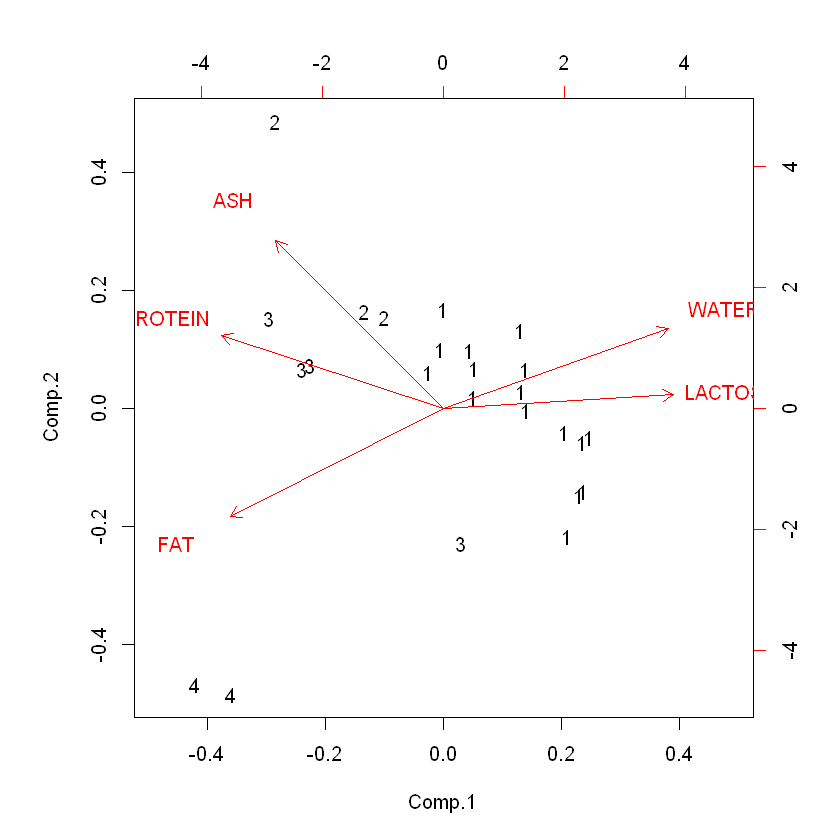

In [347]:
res3 <- hclust(dist(datos))
biplot(res, xlabs= cutree(res3,4))

**Ejercicio 3:** 

a) Explique como funciona el método hclust, describa parámetros de entrada y salida.

b) Interprete y comente los resultados obtenidos. 

c) Utilice otros parámetros en hclust y discuta como varían los resultados. 

In [348]:
#3.a
#Esta función realiza un agrupamiento jerárquico aglomerativo utilizando un conjunto de diferencias para los n objetos que se agrupan. Inicialmente, cada objeto se asigna a su propio grupo y luego el algoritmo procede de manera iterativa, en cada etapa uniendo los dos grupos más similares, continuando hasta que haya un solo grupo.
#principales parámetros de entrada:
# - d: distancia entre cada uno de los datos
# - method: método de aglomeración que será usado, por ejemplo "single" (genera grupos más extendidos), "complete" (genera grupos más concentrados) (método por defecto), "average" (estrategia promedio entre las dos anteriores).
# - members: Null o vector con el largo del tamaño de d
# - parametros relacionados con el grafico generado
# La salida de la función es un objeto de clase hclust que describe el árbol generado por el proceso de clusterización, el objeto contiene una lista con componentes, donde sus principales componentes son:
# - merge: la cual es una matriz de n-1 * 2 la que representa las uniones entre los elementos o grupos ya hechos
# - height: el valor del criterio asociado con el método de agrupamiento para la aglomeración particular
# - method: método de clusterización usado (complete, single, average).


In [349]:
#3.b
#Tomando solo 4 grupos el método caracteriza los grupos entre: 3 grupos pequeños donde un grupo contiene altos porcentajes de grasa 
#y proteína pero porcentajes de ASH considerablemente menores que los otros grupos, otro con notables porcentajes de proteína y el 
#último grupo pequeño con valores más intermedios pero sobresaliendo un poco en ASH. Finalmente el último grupo lo componen la mayor
#parte de los animales, que tienen un mayor porcentaje de agua y lactosa.


In [350]:
#3.c
# - Cambiando el método por single linkage y eligiendo 4 grupos podemos apreciar que el grupo que se caracterizaba por tener valores intermedios
#   pero con ASH un poco alto, desaparecio, y aparecio un nuevo grupo con un elemento el cual tiene bajo porcentaje de proteína y ASH, y valores 
#   intermedios para los otros atributos.
# Se puede observar también que con el método single linkage se crean fronteras más distinguibles entre los grupos.
# - Usando el método group average, para estos datos en concreto y seleccionando primero 4 y luego 3 grupos, no se aprecian cambios con respecto 
#   del resultado obtenido con el método complete linkage


**Ejercicio 4:** (3 puntos)

a) Considere los datos comunas.csv y escoja las comunas de una sola región para realizar sus análisis. Realice un análisis de clustering con K-means, GMM y Análisis Jerárquico para dichos datos, excluyendo el índice IDSE. Interprete sus resultados.

b) Estudie las medidas de calidad propuestas en Murphy, Capítulo 25: purity, rand index y mutual information (pdf en siveducMD). Calcule alguna de las medidas de calidad estudiadas, para cada uno de los análisis realizado en (a), considerando  una categorización (IDSE_bis) de los datos según el índice IDSE, de la manera siguiente:
1. IDSE_bis = 1 si 0 <= IDSE < 0.3
2. IDSE_bis = 2 si 0.3 <= IDSE < 0.4
3. IDSE_bis = 3 si 0.4 <= IDSE < 0.5
4. IDSE_bis = 4 si 0.5 <= IDSE < 0.6
5. IDSE_bis = 5 si 0.6 <= IDSE < 0.7
6. IDSE_bis = 6 si 0.7 <= IDSE < 0.8
7. IDSE_bis = 7 si 0.8 <= IDSE < 0.9
8. IDSE_bis = 8 si 0.9 <= IDSE < 1


Discuta sus resultados.

In [351]:
#       4.0 Preparando datos

# Datos iniciales con nombres de ciudad en fila
datos <- read.csv("comunas.csv", row.names = 2 ,header=TRUE,sep=";",dec=".")
dim(datos)
head(datos)

[1] 323  13

,Region,Poblacion..miles..2011,IDSE,Ingreso.per.cï..p..Mens..miles....2006.11,Pobreza...2006.11,Escolaridad..aï..os..2006.11,Material.Vivienda.bueno.o.acceptable...2006,Alcantarillado.o.Fosa.S.pt....2006,Esperanza.vida.al.nacer..aï..os..2005.10,X.ndice.Desarrollo.Humano,Tasa.AVPP.x.1000.h.2007.11,X..defunc..50..aï..os.2011,Mortalidad.Infantil.x.1000.NV.2009.11
Iquique,1,186.0,0.698,227.6,10.2,11.1,81.8,98.8,77.2,0.631,82.1,73.0,8.9
Pica,1,18.6,0.604,188.1,12.2,9.6,71.0,94.0,77.5,0.572,23.0,45.8,9.8
Pozo Almonte,1,17.3,0.591,176.0,9.8,9.7,73.1,83.5,77.3,0.574,44.3,66.7,7.1
Alto Hospicio,1,93.8,0.577,166.3,20.9,10.1,65.9,98.4,78.1,0.555,46.7,56.2,4.9
Huara,1,3.4,0.382,161.4,10.0,7.6,49.0,38.9,81.8,0.592,55.8,44.4,8.9
Calama,2,148.8,0.717,269.3,8.5,10.9,85.0,98.9,76.2,0.625,87.2,63.4,9.7


In [352]:
# Quitando IDSE
# Y seleccionando REGIÓN Metropolitana XIII

datos <- datos[datos$Region=='13',c(1,2,4,5,6,7,8,9,10,11,12,13)]

In [353]:
# Eliminando columna de Region
datos <- datos[,c(2,3,4,5,6,7,8,9,10,11,12)]

,Poblacion..miles..2011,Ingreso.per.cï..p..Mens..miles....2006.11,Pobreza...2006.11,Escolaridad..aï..os..2006.11,Material.Vivienda.bueno.o.acceptable...2006,Alcantarillado.o.Fosa.S.pt....2006,Esperanza.vida.al.nacer..aï..os..2005.10,X.ndice.Desarrollo.Humano,Tasa.AVPP.x.1000.h.2007.11,X..defunc..50..aï..os.2011,Mortalidad.Infantil.x.1000.NV.2009.11
Vitacura,79.6,1143.1,2.0,15.0,98.0,100.0,82.0,0.991,45.6,88.6,6.6
Las Condes,288.1,953.0,1.7,14.7,97.9,99.6,82.2,0.972,39.6,87.4,5.1
Providencia,126.6,966.7,1.3,14.6,95.8,100.0,80.0,0.931,57.7,89.7,8.0
Nunoa,145.1,569.3,4.1,13.7,95.7,100.0,79.4,0.841,64.4,88.5,6.7
Santiago,164.0,487.5,6.9,13.1,87.1,98.5,76.0,0.733,108.3,79.0,6.3
La Reina,95.5,530.5,5.8,12.6,86.5,100.0,80.0,0.808,53.2,86.3,5.0


 Poblacion..miles..2011 Ingreso.per.cï..p..Mens..miles....2006.11
 Min.   :  4.60         Min.   : 135.8                           
 1st Qu.: 65.25         1st Qu.: 163.1                           
 Median : 92.20         Median : 185.9                           
 Mean   :127.84         Mean   : 264.2                           
 3rd Qu.:131.57         3rd Qu.: 239.6                           
 Max.   :735.40         Max.   :1143.1                           
 Pobreza...2006.11 Escolaridad..aï..os..2006.11
 Min.   : 1.300    Min.   : 7.80               
 1st Qu.: 8.975    1st Qu.: 9.70               
 Median :10.900    Median :10.20               
 Mean   :11.063    Mean   :10.54               
 3rd Qu.:13.100    3rd Qu.:11.00               
 Max.   :20.100    Max.   :15.00               
 Material.Vivienda.bueno.o.acceptable...2006 Alcantarillado.o.Fosa.S.pt....2006
 Min.   :74.60                               Min.   : 54.30                    
 1st Qu.:82.33                            

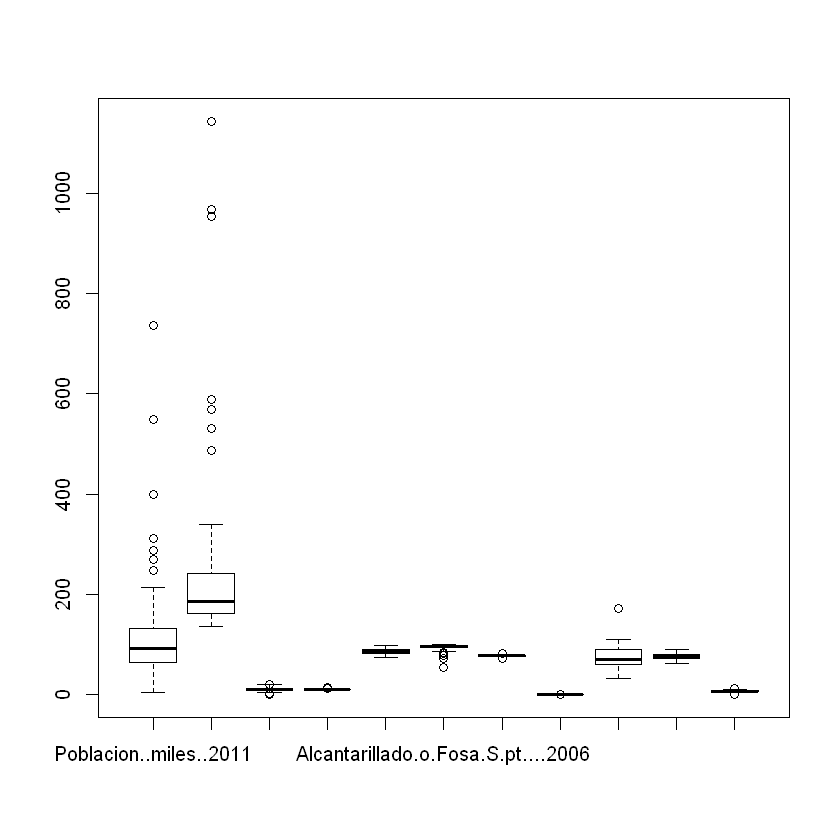

In [354]:
head(datos)
summary(datos)
boxplot(datos)

[1] 52 11

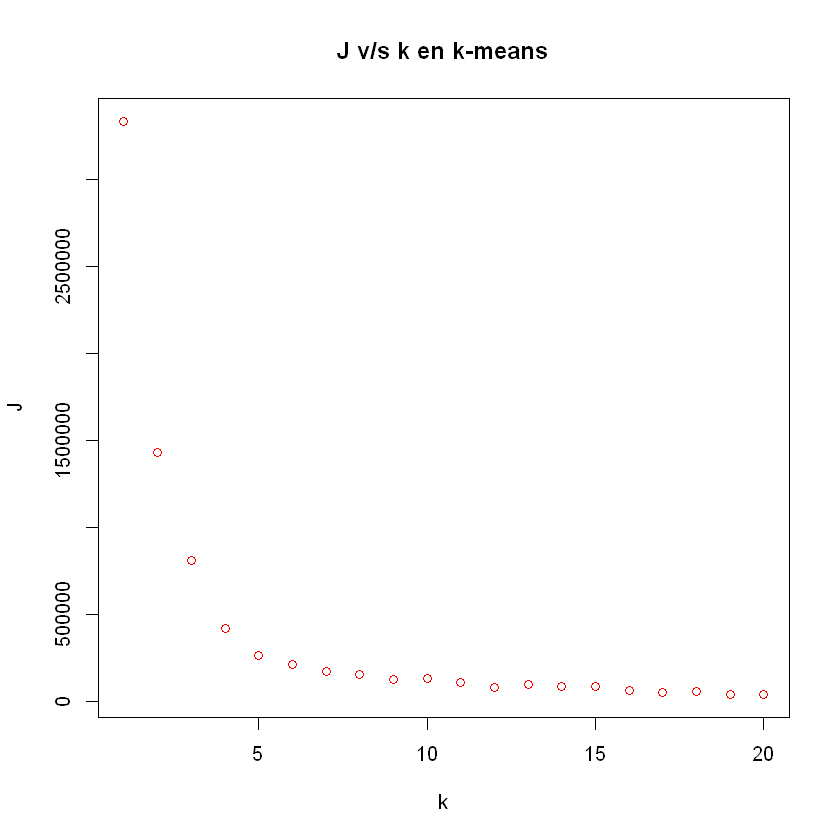

In [355]:
dim(datos) # 52 Comunas de RM

J <- rep(0,20)
fin_iter <- 20
for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	J[k]<-cl$tot.withinss
}

#Grafica
plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 


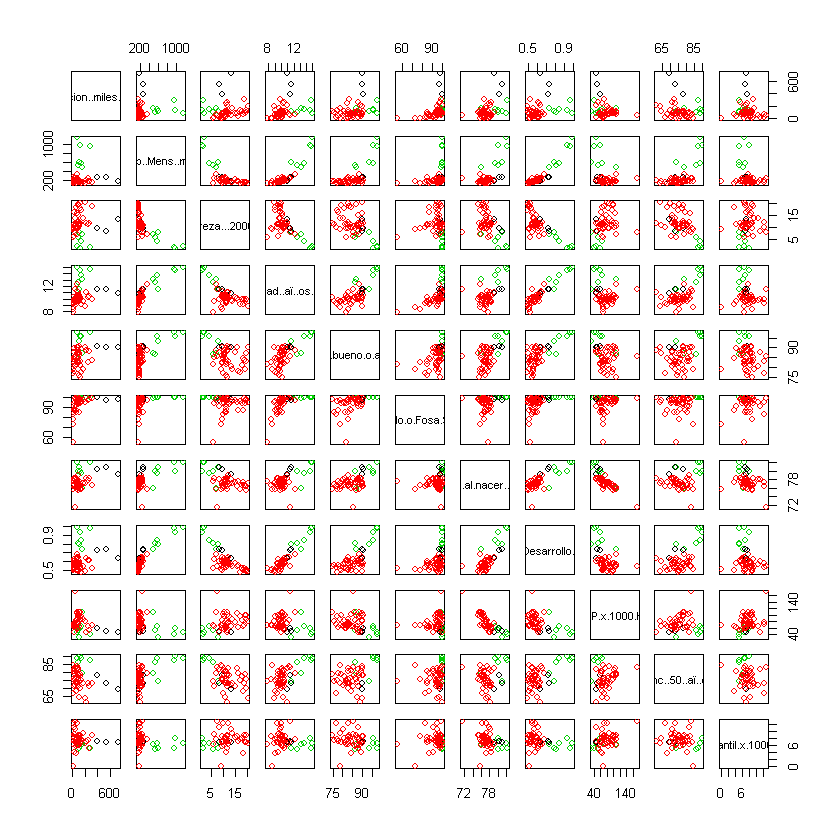

In [356]:
#       4.1 K-Means

# K = 3
k0 = 3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
pairs(datos,col=cl$cluster)
#Para saber qué ciudad corresponde a cada grupo: cl$cluster
# cl$cluster

#GRUPOS POR TAMAÑO
#1
# La Florida Maipu Puente Alto
#2
# Vitacura Las Condes Providencia Nunoa Santiago La Reina Lo Barnechea
#3 Todas las comunas restantes

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5     Comp.6     Comp.7 
2.29022616 1.35342958 1.24115246 0.92264295 0.70951302 0.64222583 0.54195632 
    Comp.8     Comp.9    Comp.10    Comp.11 
0.45614636 0.26407418 0.20566292 0.04100978 

 11  variables and  52 observations.


Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11
1.9290994,2.42371040,1.81892572,-0.031731090,1.66183678,-0.02478095,0.464726821,-0.19287551,-0.126220182,-0.07399226,0.01429747
-0.9327059,-0.08210219,-0.06488325,-0.006947498,-0.09214508,-0.02031725,-0.002168726,-0.03346976,0.005406261,0.00173160,-0.00375252
4.7694784,-0.54611986,-0.39024008,0.055284025,-0.15934528,0.13252388,-0.186156279,0.28347949,0.021656798,0.02132137,0.01638763


K-means clustering with 3 clusters of sizes 3, 42, 7

Cluster means:
  Poblacion..miles..2011 Ingreso.per.cï..p..Mens..miles....2006.11
1               560.8667                                  232.3667
2                94.2000                                  185.8238
3               144.0714                                  748.2857
  Pobreza...2006.11 Escolaridad..aï..os..2006.11
1         10.233333                     11.33333
2         12.264286                      9.97619
3          4.214286                     13.61429
  Material.Vivienda.bueno.o.acceptable...2006
1                                    90.26667
2                                    84.14524
3                                    93.50000
  Alcantarillado.o.Fosa.S.pt....2006 Esperanza.vida.al.nacer..aï..os..2005.10
1                           98.10000                                 80.20000
2                           92.41667                                 76.93571
3                           99.68571             

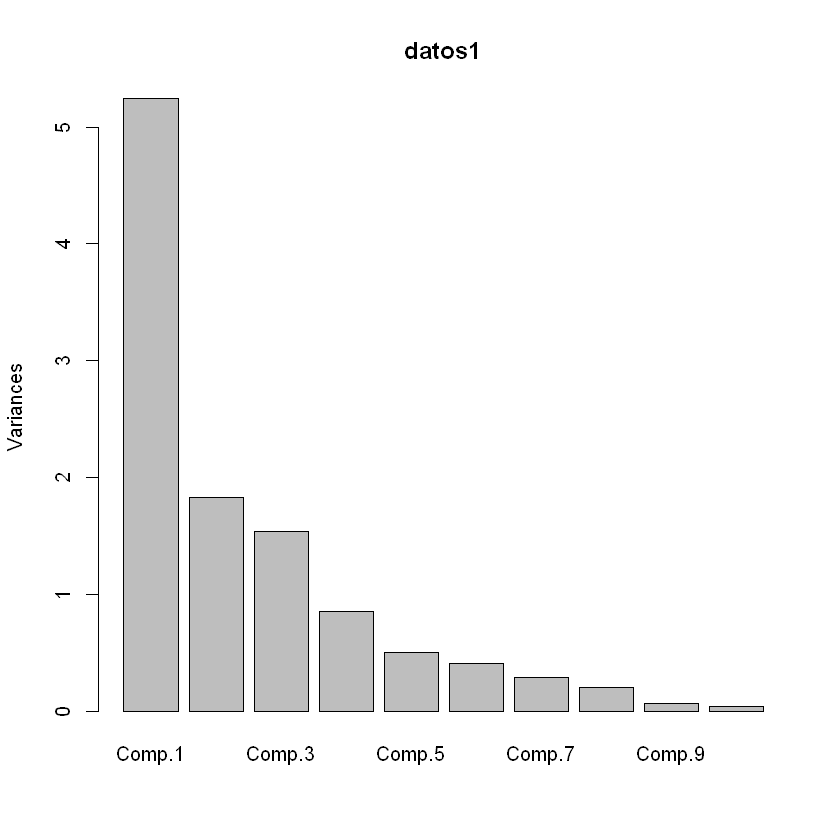

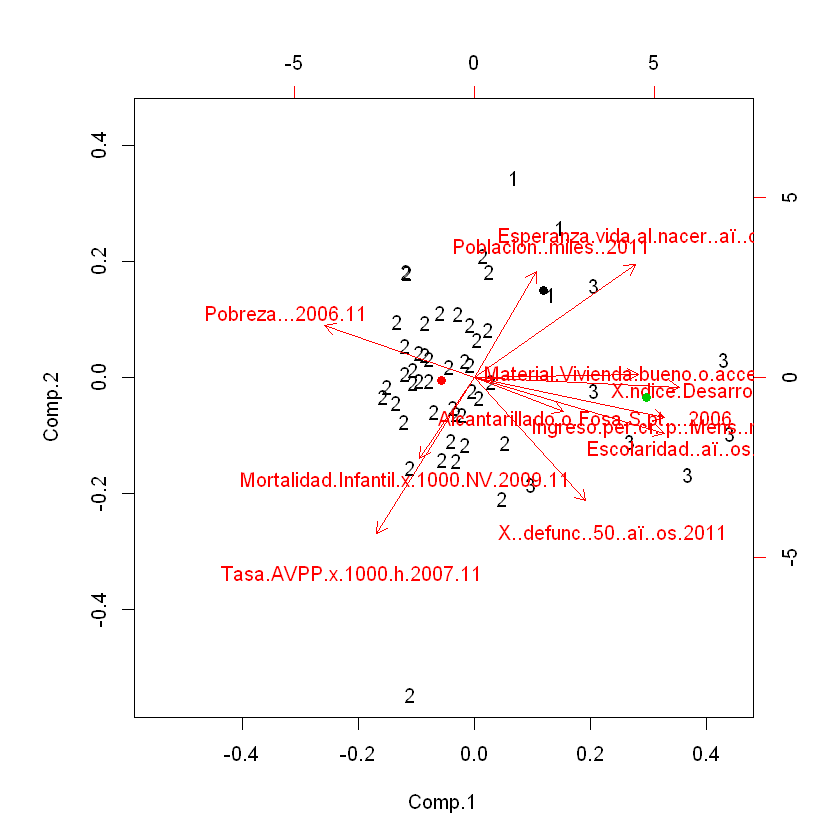

In [357]:
#KMEANS
datos1 <- princomp(datos, cor=TRUE)
print(datos1)
plot(datos1) #barras
datos2 <- predict(datos1,cl$centers)
datos2
cl
biplot(datos1,xlabs=cl$cluster) #flechas
points(datos2[,1:11],col=1:k0,pch=19)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 3 components: 

 log-likelihood  n  df       BIC       ICL
       -1230.49 52 213 -3302.595 -3302.604

Clustering table:
 1  2  3 
15  9 28 

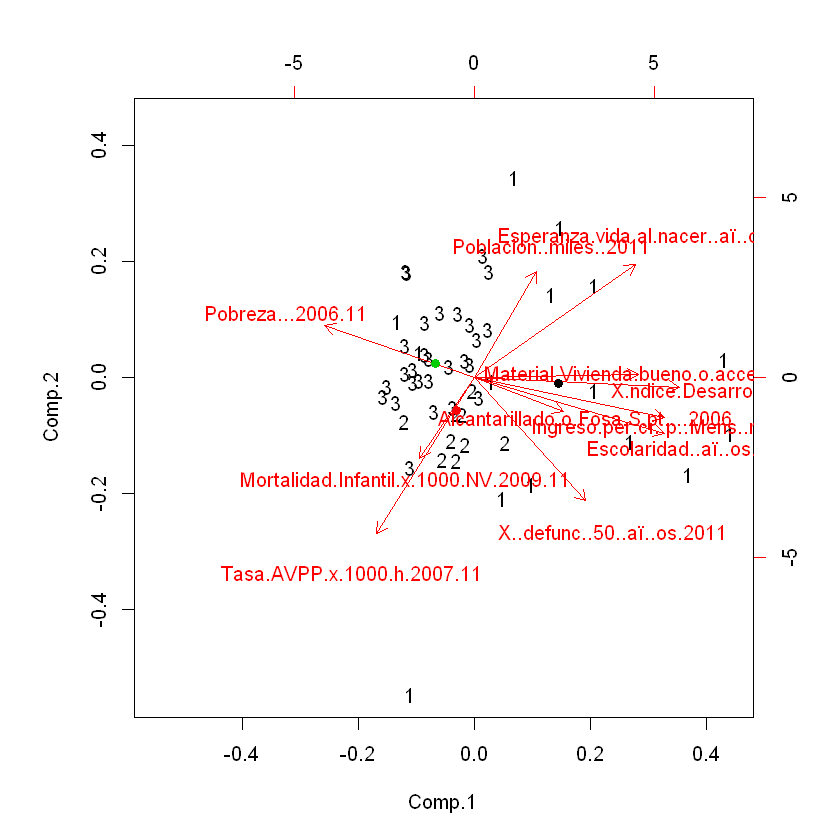

In [358]:
clus = Mclust(datos,G=3)
summary(clus)
cl <- clus$classification
centers <- t(clus$parameters$mean)
#GMM
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
points(res2[,1:11],col=1:k0,pch=19)

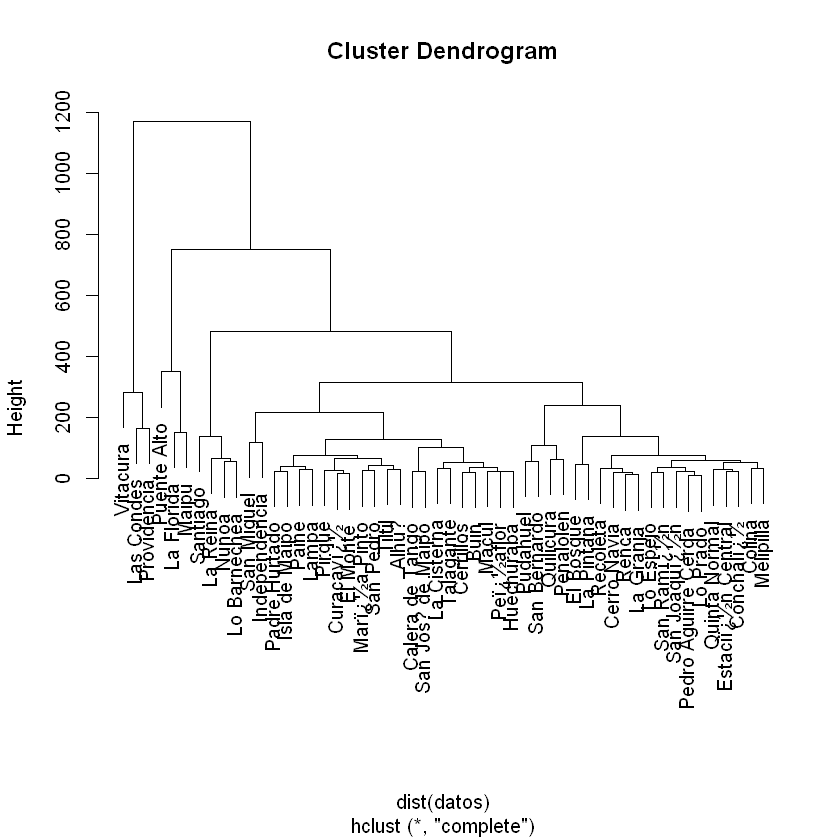

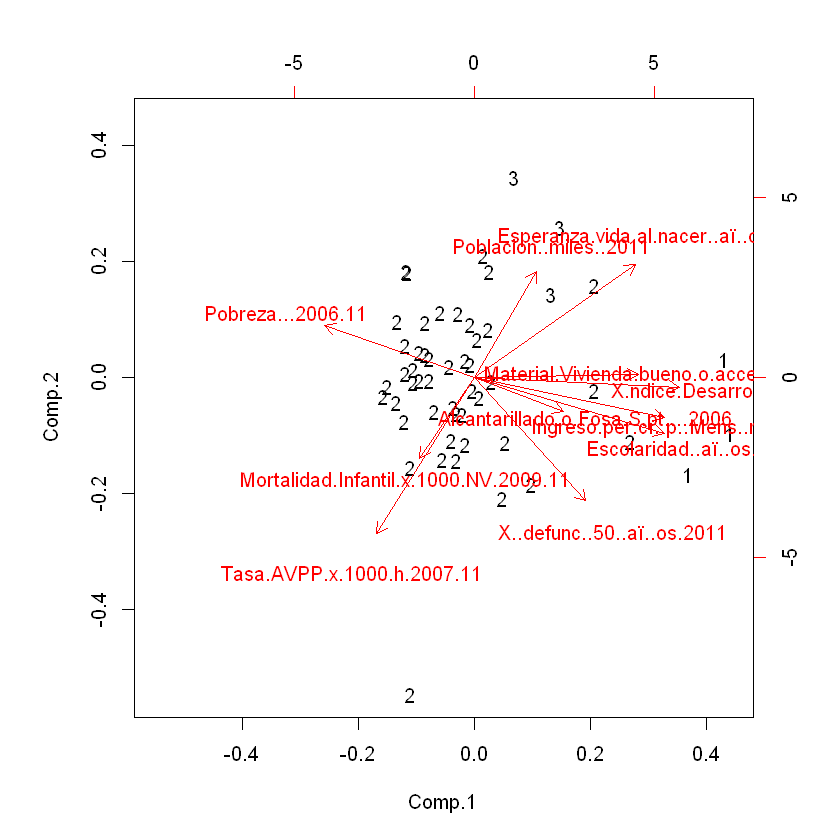

In [359]:
# Agrupamiento Jerarquico
res3 <- hclust(dist(datos))
plot(res3)
biplot(res, xlabs= cutree(res3,3))

In [360]:
# Se escogió K = 3 Y por ende G = 3

# El GMM tiene problemas con los números centrales, llegando a verse hasta los 3 grupos mezclados sin distinción en el centro de componentes
# Se podría decir que hizo la peor agrupación de los 3

# En el caso del Jerarquico tiene dificultades para el grupo de arriba cercano a Población miles (3 y 2)

# El agrupamiento de K-means para este caso, presenta problemas similares al Jerarquico, siendo el K-means un poco visualmente mejor que el Jerarquico

